<a href="https://colab.research.google.com/github/GunavathiC/ML_Algorithms/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [18]:
#Load the dataset

df = pd.read_csv('/content/agricultural sustainability.csv')
print(df)

     soil_health   crop_yield  water_usage  carbon_footprint  fertilizer_use  \
0       0.374540  6778.284815   964.057410        126.020778      226.809659   
1       0.950714  1757.259685  4561.488080        175.365653       88.134761   
2       0.731994  2454.658427  2773.635676        129.654718      194.072090   
3       0.598658  9086.987697  4219.058597         89.916140      201.678762   
4       0.156019  6457.861537  1940.223205        104.286142      156.032668   
..           ...          ...          ...               ...             ...   
195     0.349210  9376.815930  2632.827381        442.455759       72.895518   
196     0.725956  8725.714767  3504.009823        469.453227      279.328394   
197     0.897110  4860.946246  1275.439420        304.309933       84.204658   
198     0.887086  7757.839610  1365.300585        363.492871      287.559338   
199     0.779876  7790.885867   683.908773        465.124722      161.501443   

     sustainability  
0                

In [19]:
X = df[['soil_health','crop_yield','water_usage','carbon_footprint','fertilizer_use']]
y = df['sustainability']

In [20]:
X

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use
0,0.374540,6778.284815,964.057410,126.020778,226.809659
1,0.950714,1757.259685,4561.488080,175.365653,88.134761
2,0.731994,2454.658427,2773.635676,129.654718,194.072090
3,0.598658,9086.987697,4219.058597,89.916140,201.678762
4,0.156019,6457.861537,1940.223205,104.286142,156.032668
...,...,...,...,...,...
195,0.349210,9376.815930,2632.827381,442.455759,72.895518
196,0.725956,8725.714767,3504.009823,469.453227,279.328394
197,0.897110,4860.946246,1275.439420,304.309933,84.204658
198,0.887086,7757.839610,1365.300585,363.492871,287.559338


In [21]:
y

,sustainability
0,0
1,0
2,0
3,0
4,0
...,...
195,0
196,0
197,0
198,0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use
79,0.115869,8162.134025,2853.940299,439.478207,105.493040
197,0.897110,4860.946246,1275.439420,304.309933,84.204658
38,0.684233,6809.250663,3678.090022,171.159454,195.147088
24,0.456070,3386.821309,759.014420,328.214647,184.348901
122,0.318003,6941.776390,4864.614790,79.923320,273.638057
...,...,...,...,...,...
106,0.410383,5646.703135,4599.172330,195.059230,254.360890
14,0.181825,7409.612992,3343.267455,443.110381,267.474091
92,0.760785,8403.405046,1748.215323,278.424670,257.554966
179,0.137521,3536.692973,1662.099747,338.516435,199.210712


In [24]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.925


In [26]:
y_pred = model.predict(X_test)

In [27]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

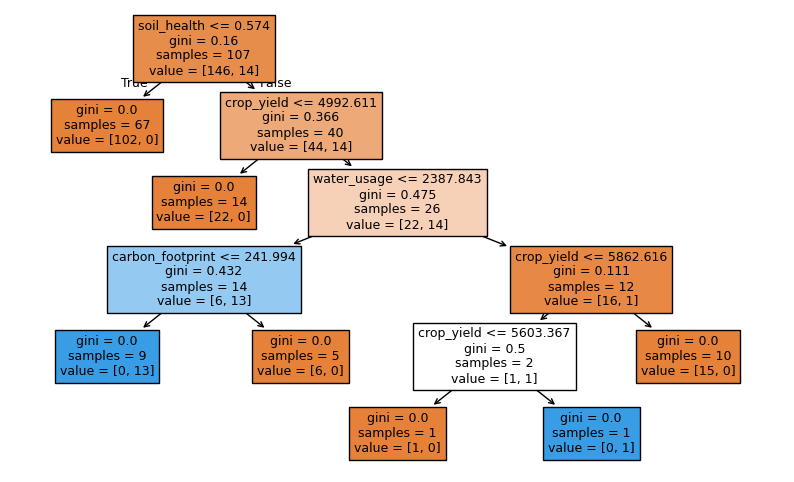

In [29]:
#plotting the tree graph for random forest
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# The following lines are removed as they are redundant and cause NameError
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)
plt.figure(figsize=(10,6))
plot_tree(model.estimators_[0],filled=True,feature_names=X.columns)
plt.show()